In [5]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import env
import wrangle
import explore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

1. Load your zillow dataset.

In [6]:
#pull my data
df = wrangle.wrangle_zillow()
df.head()

,bedroom,bathroom,area,tax_value,year_built,tax_amount,fips
7,3,2.0,2077,646760,1926,7924.68,6037
18,3,1.0,1244,169471,1950,2532.88,6037
19,3,2.0,1300,233266,1950,3110.99,6037
20,3,2.0,1222,290492,1951,3870.25,6037
40,2,1.0,725,37548,1953,576.47,6037


In [7]:
#split data
train, validate, test = wrangle.split_data(df)
train.shape,validate.shape,test.shape

((1023397, 7), (438600, 7), (365500, 7))

In [8]:
train.head()

,bedroom,bathroom,area,tax_value,year_built,tax_amount,fips
1927212,3,2.0,2365,529671,1976,5644.78,6111
539627,4,3.0,2434,161495,1960,2103.93,6037
1231220,3,2.0,1751,104395,1920,1405.93,6037
877619,3,2.0,1532,500000,1961,5839.49,6037
665807,3,2.0,1680,656866,1963,7692.52,6059


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft

In [9]:
# using minmaxscaler
scaler = MinMaxScaler()
#fit the scaler on area 
scaler.fit_transform(train[["area"]])
#transform tax_value and area
train["scaled_area"]= scaler.transform(train[["area"]])

In [10]:
train.head()

,bedroom,bathroom,area,tax_value,year_built,tax_amount,fips,scaled_area
1927212,3,2.0,2365,529671,1976,5644.78,6111,0.693686
539627,4,3.0,2434,161495,1960,2103.93,6037,0.713950
1231220,3,2.0,1751,104395,1920,1405.93,6037,0.513363
877619,3,2.0,1532,500000,1961,5839.49,6037,0.449046
665807,3,2.0,1680,656866,1963,7692.52,6059,0.492511


In [11]:
#create regression
lm=LinearRegression()
#fit
lm.fit(train[["scaled_area"]], train.tax_value)
#predict
train["tax_value_hat"] = lm.predict(train[["scaled_area"]])

In [12]:
#subset train data with only useful columns
train_subset = train[["scaled_area","tax_value","tax_value_hat"]]
train_subset.head()

,scaled_area,tax_value,tax_value_hat
1927212,0.693686,529671,444523.330843
539627,0.713950,161495,455332.748152
1231220,0.513363,104395,348335.182615
877619,0.449046,500000,314027.032025
665807,0.492511,656866,337212.448862


3. Plot the residuals for the linear regression model that you made.

In [13]:
#residual = actual - predicted
train_subset["residual"] = train_subset.tax_value - train_subset.tax_value_hat
train_subset.head()

,scaled_area,tax_value,tax_value_hat,residual
1927212,0.693686,529671,444523.330843,85147.669157
539627,0.713950,161495,455332.748152,-293837.748152
1231220,0.513363,104395,348335.182615,-243940.182615
877619,0.449046,500000,314027.032025,185972.967975
665807,0.492511,656866,337212.448862,319653.551138


Text(0.5, 0, 'tax_value')

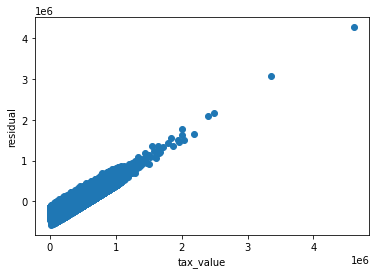

In [14]:
#plot tax value vs residual
plt.scatter(y = "residual", x = "tax_value" , data = train_subset)
plt.ylabel("residual")
plt.xlabel("tax_value")

Text(0, 0.5, 'Residual of Tax Value')

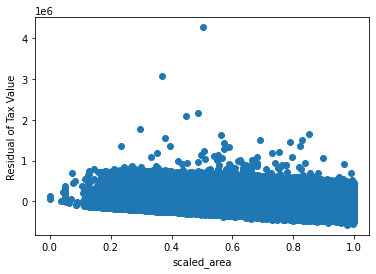

In [34]:
#vizualise area vs residual
plt.scatter(train_subset.scaled_area, train_subset.residual)
plt.xlabel('scaled_area')
plt.ylabel('Residual of Tax Value')

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model

In [15]:
#sum of squared errors
train_subset['residual_squared'] = train_subset.residual ** 2
SSE = train_subset.residual_squared.sum()
SSE

3.5294031414104308e+16

In [16]:
#explained sum of squared errors
ESS = sum((train_subset.tax_value_hat - train_subset.tax_value.mean())**2)
ESS

8111405104328345.0

In [17]:
#Total sum of squares
TSS = ESS + SSE
TSS

4.340543651843266e+16

In [18]:
#mean square error
MSE = SSE/len(train_subset)
MSE

34487135895.555984

In [19]:
#Root mean square error
RMSE = MSE ** .5
RMSE

185707.12397631918

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount)

In [20]:
train_subset.head(1)

,scaled_area,tax_value,tax_value_hat,residual,residual_squared
1927212,0.693686,529671,444523.330843,85147.669157,7.250126e+09


In [21]:
#baseline is the mean of the target
train_subset["baseline"] = train_subset.tax_value.mean()
train_subset[:2]

,scaled_area,tax_value,tax_value_hat,residual,residual_squared,baseline
1927212,0.693686,529671,444523.330843,85147.669157,7.250126e+09,334441.879468
539627,0.713950,161495,455332.748152,-293837.748152,8.634062e+10,334441.879468


In [22]:
# Mean squared error
MSE_baseline = mean_squared_error(train_subset.tax_value, train_subset.baseline)
MSE_baseline

42413097281.33837

In [23]:
#Sum of squared error
SSE_baseline = MSE_baseline * len(train_subset)
SSE_baseline

4.340543651842985e+16

In [24]:
#root mean square error
RMSE_baseline = MSE_baseline ** 0.5
RMSE_baseline

205944.40337464472

In [25]:
# another way for rmse
RMSE_baseline = mean_squared_error(train_subset.tax_value, train_subset.baseline, squared = False)
RMSE_baseline

205944.40337464472

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [26]:
#Evaluate the result of my model against the baseline
if SSE < SSE_baseline:
    print('our model is better than the baseline')
else:
    print('our model is not better than the baseline')

our model is better than the baseline


7. What is the amount of variance explained in your model?

In [27]:
#use formula for r2
R2 = ESS/TSS
R2

0.18687532610998478

In [28]:
#use sklearn to find r2
r2_score(train_subset.tax_value, train_subset.tax_value_hat)

0.1868753261099323

8. Is your model better than the baseline model?

In [29]:
#for baseline
baseline_accuracy = r2_score(train_subset.tax_value, train_subset.baseline)
baseline_accuracy

0.0

In [30]:
#yes, the model is better than baseline

9. Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot

regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE), explained sum of squares (ESS),total sum of squares (TSS), mean squared error (MSE), root mean squared error (RMSE)

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [31]:
def plot_residuals(y,yhat):
    df['residual'] = df.y - df.yhat
    plt.plot(df.y,df.residual)
    

In [32]:
def regression_errors(y,yhat):
    MSE = mean_squared_error(df.y,df.yhat)
    print("MSE:", MSE) 
    RMSE = mean_squared_error(df.y,df.yhat,squared = False)
    print("RMSE:", RMSE)
    SSE = MSE * len(df)
    print("SSE:", SSE)
    ESS = sum((yhat - y.mean())**2)
    
    
    